<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/practice_book/02_district_house_price_median_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

## Get the data

In [3]:
import urllib

path = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
urllib.request.urlretrieve(path,'housing.tgz')

('housing.tgz', <http.client.HTTPMessage at 0x791d3a8375b0>)

In [4]:
!tar -zxvf housing.tgz

housing.csv


In [5]:
!ls -ltr

total 1796
-rw-r--r-- 1  501 staff 1423529 May  3  2016 housing.csv
drwxr-xr-x 1 root root     4096 Aug 11 13:34 sample_data
-rw-r--r-- 1 root root   409488 Aug 15 11:00 housing.tgz


In [6]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.shape

(20640, 10)

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: >

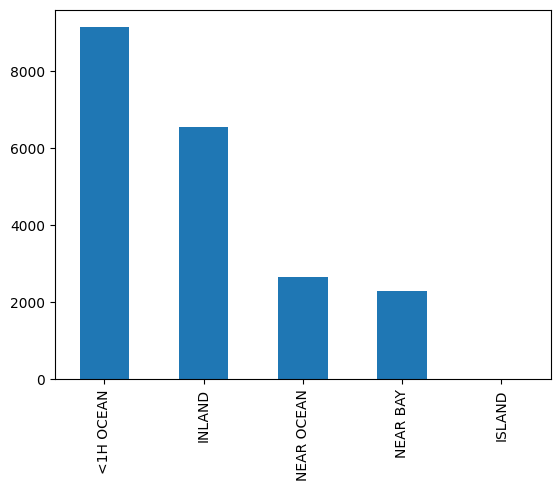

In [11]:
df.ocean_proximity.value_counts().plot(kind='bar')

In [12]:
print(df.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

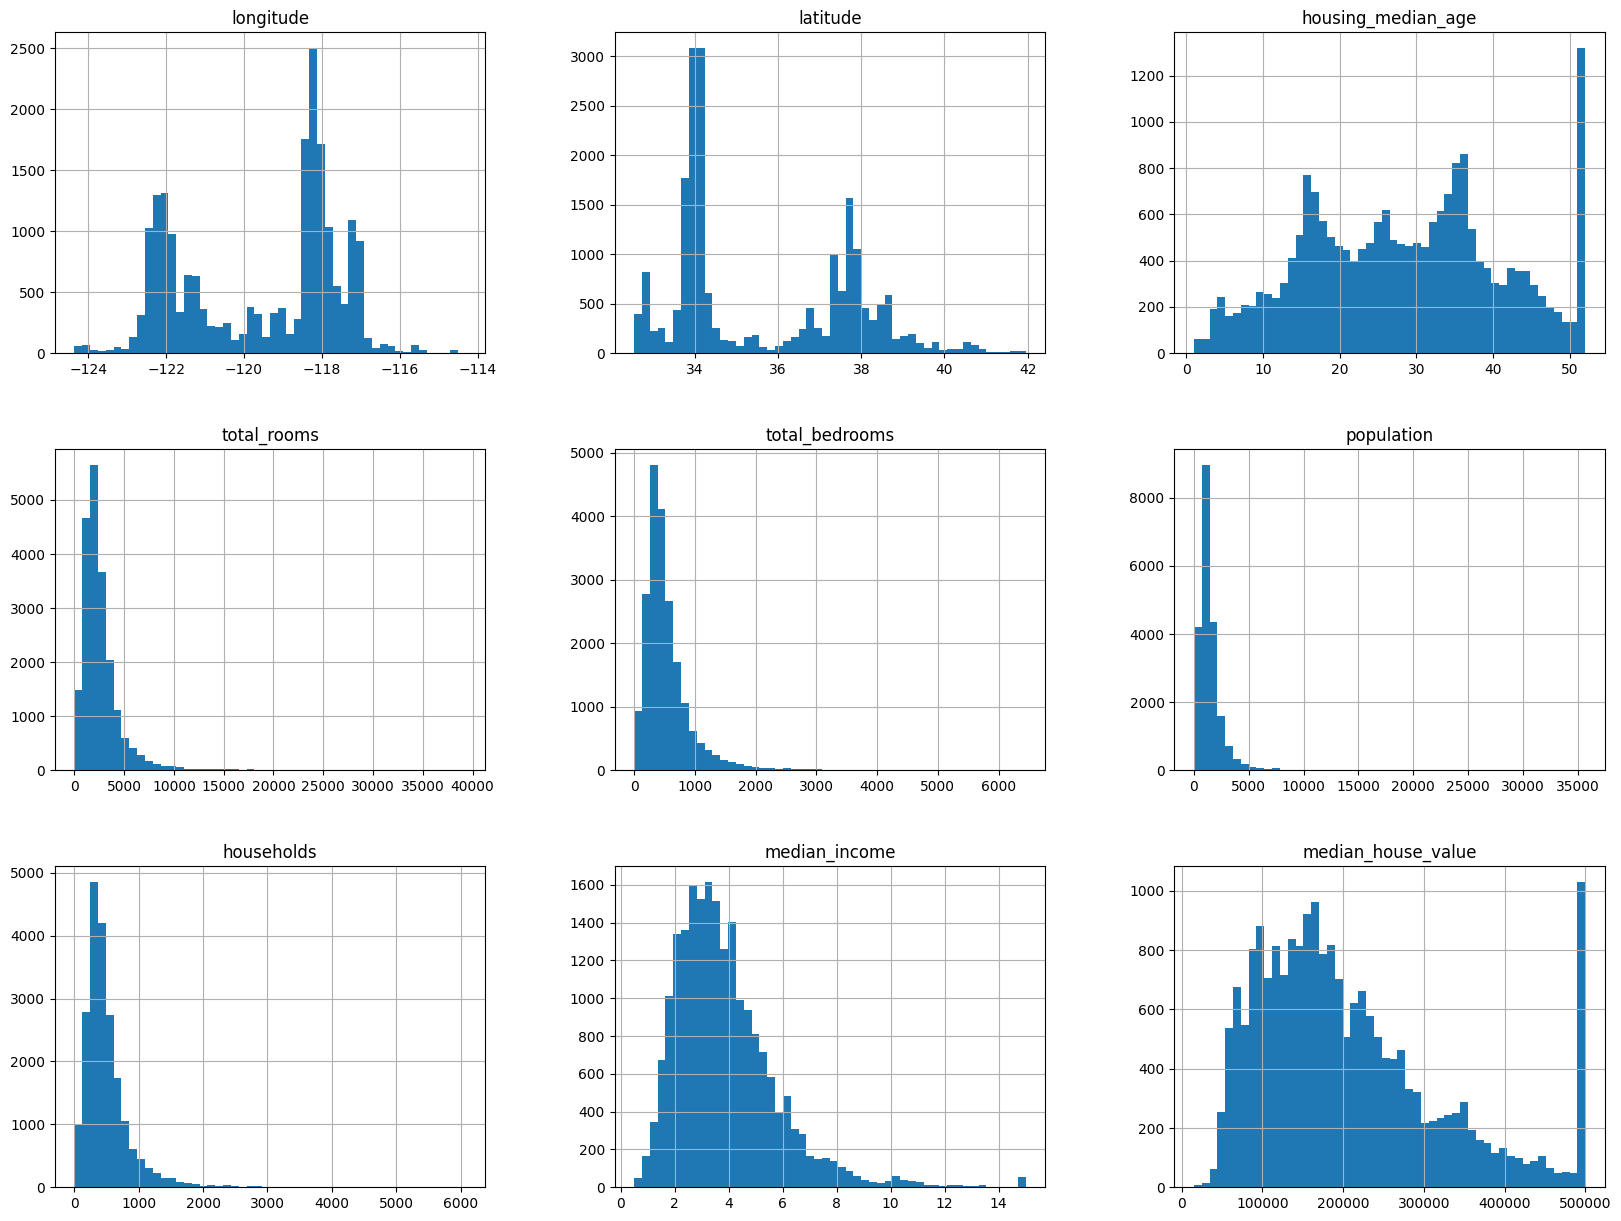

In [13]:
%matplotlib inline

df.hist(bins=50,figsize=(20,15))

In [14]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df,test_size=0.2,random_state=2023)

In [16]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,164100.0,INLAND
17336,-120.45,34.88,15.0,2143.0,286.0,929.0,315.0,5.7306,269700.0,<1H OCEAN
15150,-116.84,32.92,20.0,1066.0,219.0,536.0,173.0,3.1607,119300.0,<1H OCEAN
11440,-117.97,33.73,18.0,3698.0,574.0,2046.0,614.0,6.2984,269800.0,<1H OCEAN
3988,-118.65,34.18,27.0,1793.0,339.0,1016.0,326.0,4.9250,240300.0,<1H OCEAN


<Axes: >

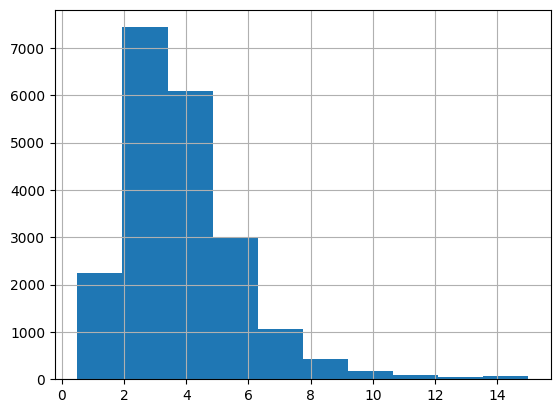

In [17]:
df.median_income.hist()

In [18]:
df['income_cat'] = pd.cut(
    df['median_income'],
    bins= [0,1.5,3.0,4.5,6,np.inf],
    labels = [1,2,3,4,5]
)

<Axes: >

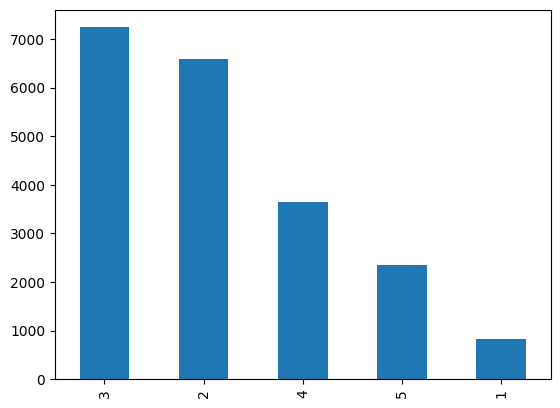

In [21]:
df.income_cat.value_counts().plot(kind='bar')

<Axes: >

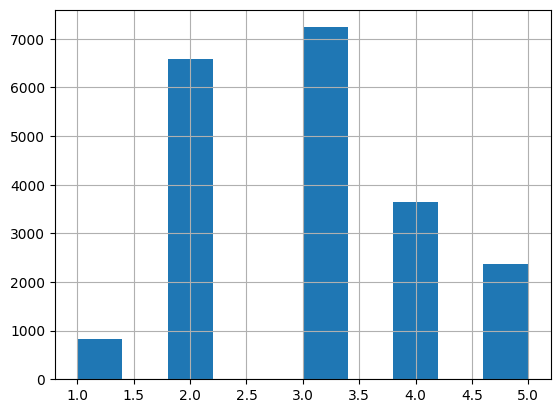

In [22]:
df.income_cat.hist()

Stratified Sampling

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=2023)
for train_index,test_index in split.split(df,df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [24]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [25]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [26]:
df['income_cat'].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [27]:
# here values share in both train and test split and original data is same

In [28]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

### Data Visualization

Text(0, 0.5, 'latitude')

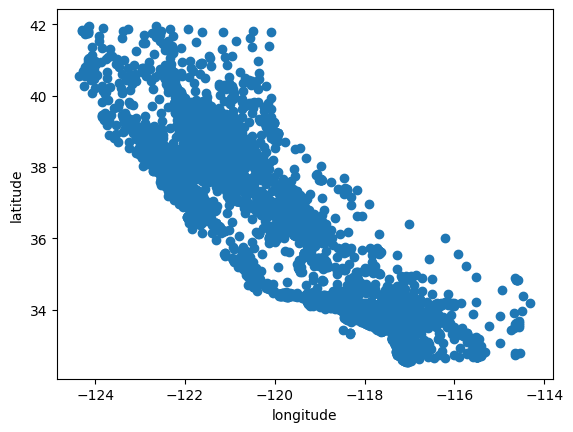

In [30]:
plt.scatter(df.longitude,df.latitude)
plt.xlabel('longitude')
plt.ylabel('latitude')

Text(0, 0.5, 'latitude')

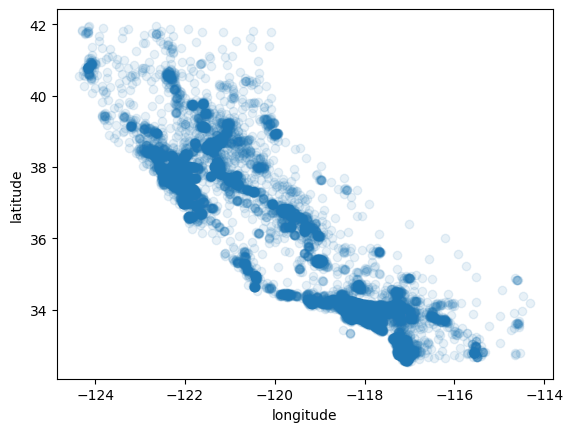

In [31]:
plt.scatter(df.longitude,df.latitude,alpha=0.1) # shows high density data point
plt.xlabel('longitude')
plt.ylabel('latitude')